06.1

<ipython-input-90-c9bea86dee13>:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot()


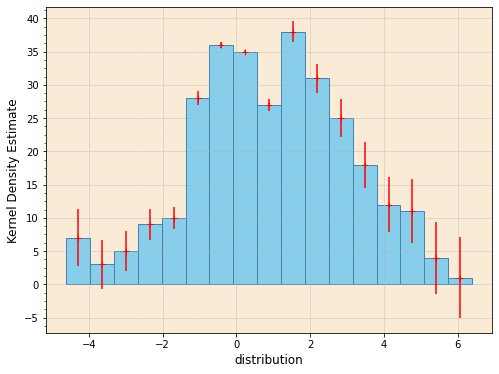

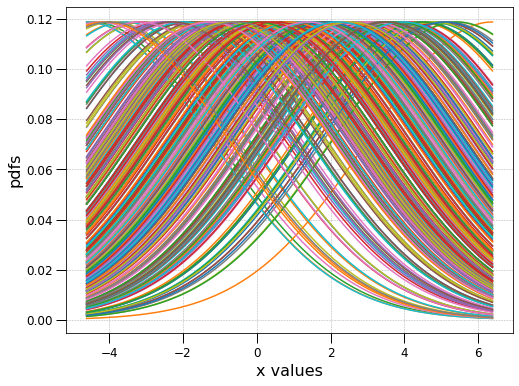

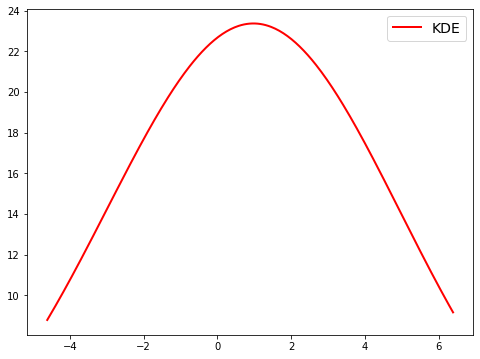

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as ticker
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
import scipy as sp

N=300
fig = plt.figure(figsize=(8,6))
array=np.array(np.random.normal(1, 2 , N))
hist_kde=plt.hist(array, color='skyblue',ec = "steelblue",  label='Histogram', bins=int(np.sqrt(N)))
plt.xlabel('distribution', fontsize = 12)
plt.ylabel('Kernel Density Estimate', fontsize = 12)
ax = fig.add_subplot()
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
bin_centers = 0.5*(hist_kde[1][1:] + hist_kde[1][:-1])
ax.errorbar(bin_centers, hist_kde[0], yerr=bin_centers, fmt='+', color='r', label='Errors') 
plt.grid(linestyle="--", linewidth=0.5)
ax.set_facecolor('#FAEBD7')

fig2 = plt.figure(figsize=(8,6))
sigma = 1.06*x.std()*x.size**(-1/5)
gussian_x = np.linspace(array.min(), array.max(), N)
gs= np.zeros((N,N))

for i in range(N):    
    gs[i] = stats.norm.pdf(gussian_x, array[i], sigma)
    plt.plot(gussian_x, gs[i])
    
# plt.set_title("Gaussians", fontsize=18, fontweight='bold')
plt.xlabel("x values", fontsize=16)
plt.ylabel("pdfs", fontsize=16)
plt.grid(linestyle="--", linewidth=0.5)
plt.tick_params( width=1.0, length=10, labelsize=12)

fig = plt.figure(figsize=(8,6))
sumg = np.sum(gs,axis=0)
area = sp.integrate.trapz(y = sumg, x = gussian_x,)
normal = np.sum(np.diff(hist_kde[1])*hist_kde[0])/area
plt.plot(gussian_x, sumg*normal, '-r', linewidth=2, label='KDE')
plt.legend(loc='best', fontsize=14)

06.2

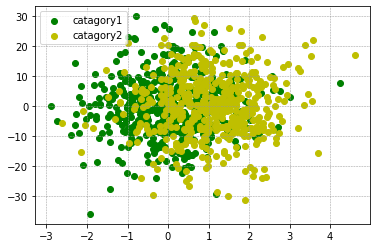

<Figure size 720x576 with 0 Axes>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
mean1 = [0, 0]
cov1 = [[1, 0], [0, 100]]
mean2= [1, 1]
cov2= [[1, 0], [0, 100]] 
N=500
def function(mean1,cov1,mean2,cov2,N) :
    x1, y1 = np.random.multivariate_normal(mean1, cov1, N).T
    x2, y2 = np.random.multivariate_normal(mean2, cov2, N).T
    plt.scatter(x1, y1, c='g', label='catagory1')
    plt.scatter(x2, y2, c='y', label='catagory2')
    plt.grid(color = '0.6', linestyle = '--', linewidth = 0.5)
    plt.legend(loc='best')
    plt.figure(figsize=(10,8))

function(mean1,cov1,mean2,cov2,N)




06.3

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns] /n
       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
8      -0.042857        3.3
9       0.128571        5.3
10      0.085714       15.0
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[10489 rows x 2 columns]
Regression parameters: 0.577913366635926 10.025258299436526 0.043403510522559086 8.717037183576464e-06 0.1298980963225655
slope 0.577913366635926


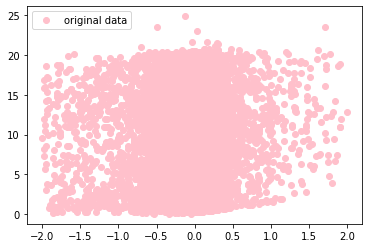

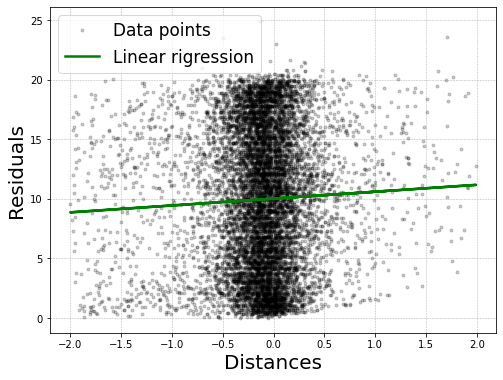

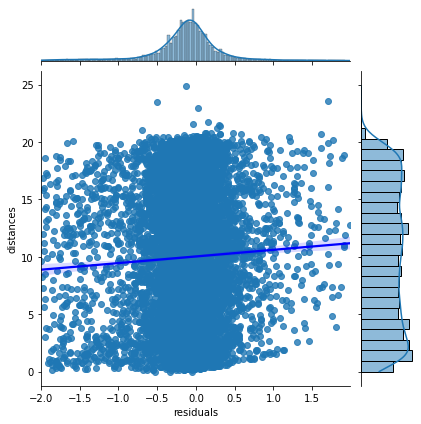

In [53]:
import numpy as np
import pandas as pd
filename="residuals_261.npy"
x=np.load("residuals_261.npy",allow_pickle=True)
df=pd.DataFrame(x.item())
print(df,'/n')

Cleaned=df[abs(df["residuals"]) < 2]
Cleaned.describe()
print(Cleaned)
from scipy import stats
import scipy as sc
y = Cleaned['distances']
x = Cleaned['residuals']
slope, intercept, r_value, p_value, std_err=sc.stats.linregress(x,y)
print("Regression parameters:",slope, intercept, r_value, p_value, std_err)
plt.plot(x, y, 'o', c='pink', label='original data',)
plt.legend(loc = 'best')
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(x, y, '.', color = 'k',label = 'Data points',alpha=0.2)
ax.plot(x, intercept + slope*x, color = 'green',linewidth = 2.5 , label = 'Linear rigression')
ax.grid(linestyle = "--", linewidth = 0.5)
ax.legend(loc = "best", fontsize = 17)
ax.set_xlabel('Distances', fontsize = 20)
ax.set_ylabel('Residuals', fontsize = 20)
print('slope',slope)
import seaborn as sns
sns.jointplot(x="residuals", y="distances", data=Cleaned ,  kind="reg", line_kws={'color':'blue', 'label':'Fit'})



[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5 19.5] [-1.63507709 -1.26851784 -0.87772335 -0.90396863 -0.69613751 -0.65473417
 -0.40076208 -0.67798246 -0.65773526 -0.54767796 -0.1800243  -0.23198627
 -0.21234419 -0.40038911 -0.42970627 -0.32839048 -0.30628855 -0.55519652
 -0.69960506 -0.41503913]
0        1.100000
1       -1.950000
2       -7.200000
3       -4.150000
4       -6.590000
           ...   
11126   -0.760000
11127    0.380000
11128    0.083333
11129    0.166667
11130    0.083333
Name: residuals, Length: 11131, dtype: float64


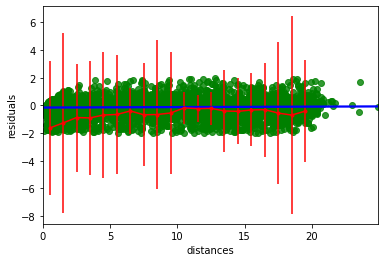

In [57]:
print(x,y)
print(df['residuals'])
half_bin = 0.5
x = np.linspace(1,20,20)-half_bin
# y and erry
df2 = df.copy()
y = np.zeros(20)
erry = np.zeros(20)
for i in range(20):
    res_bins = df2[df2['distances']<(x[i]+half_bin)]
    y[i] = np.mean(res_bins['residuals'])
    erry[i] = np.std(res_bins['residuals'])
    df2 = df2[df2['distances']>=(x[i]+half_bin)]
sns.regplot(x=Cleaned['distances'], y=Cleaned['residuals'], color='g',line_kws={"color": "blue"})
plt.errorbar(x=x, y=y, yerr=erry, marker='.',color='r')
plt.show()